In [416]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [417]:
data=pd.read_csv("housing.csv")

In [418]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [419]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [420]:
data.dropna(inplace=True)

In [421]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [422]:
data['total_rooms']=np.log(data['total_rooms']+1)
data['total_bedrooms']=np.log(data['total_bedrooms']+1)
data['population']=np.log(data['population']+1)
data['households']=np.log(data['households']+1)

In [423]:
data.ocean_proximity.value_counts()
# One Hot Encoding
data=data.join(pd.get_dummies(data.ocean_proximity)).drop(['ocean_proximity'],axis=1)

In [424]:
#feature engineering: bedroom ratio, rooms in a household, population in a household
data['bedroom_ratio']=data['total_bedrooms']/data['total_rooms']
data['household_rooms']=data['total_rooms']/data['households']
data['household_population']=data['population']/data['households']

In [425]:
data['bedroom_ratio']=np.log(data['bedroom_ratio']+1)
data['household_rooms']=np.log(data['household_rooms']+1)
data['household_population']=np.log(data['household_population']+1)

In [426]:
from sklearn.model_selection import train_test_split
x=data.drop(['median_house_value'],axis=1)
y=data['median_house_value']

In [427]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [428]:
train_data=x_train.join(y_train)

In [429]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms,household_population,median_house_value
2684,-115.55,32.98,24.0,7.850104,6.274762,7.277939,6.161207,3.2593,False,True,False,False,False,0.587410,0.821592,0.779899,80800.0
11718,-120.10,39.20,20.0,7.440734,5.686975,6.016157,5.164786,3.0870,False,True,False,False,False,0.567756,0.892271,0.772347,196900.0
13983,-116.85,34.98,26.0,8.190632,6.675823,7.428927,6.411818,2.6587,False,True,False,False,False,0.596116,0.823046,0.769474,57400.0
1640,-121.84,37.98,8.0,8.923458,6.993933,8.109526,6.924612,5.2699,False,True,False,False,False,0.578729,0.827966,0.775241,204200.0
6123,-117.93,34.12,36.0,5.686975,4.219508,5.587249,4.394449,3.5385,False,True,False,False,False,0.555011,0.830352,0.820411,134400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10520,-117.69,33.55,4.0,7.475906,5.398163,6.559615,5.416100,8.3275,True,False,False,False,False,0.543530,0.867231,0.793505,384200.0
8183,-118.09,33.79,36.0,8.345455,6.489205,7.555905,6.448889,5.8491,True,False,False,False,False,0.575249,0.830337,0.775492,247300.0
19962,-119.29,36.12,24.0,7.130099,5.424950,6.464588,5.303305,2.4722,False,True,False,False,False,0.565798,0.852056,0.797045,129200.0
9639,-120.85,37.08,3.0,8.139149,6.416732,7.370860,6.131226,4.1779,False,True,False,False,False,0.581310,0.844791,0.789449,147800.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'bedroom_ratio'}>],
       [<Axes: title={'center': 'household_rooms'}>,
        <Axes: title={'center': 'household_population'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

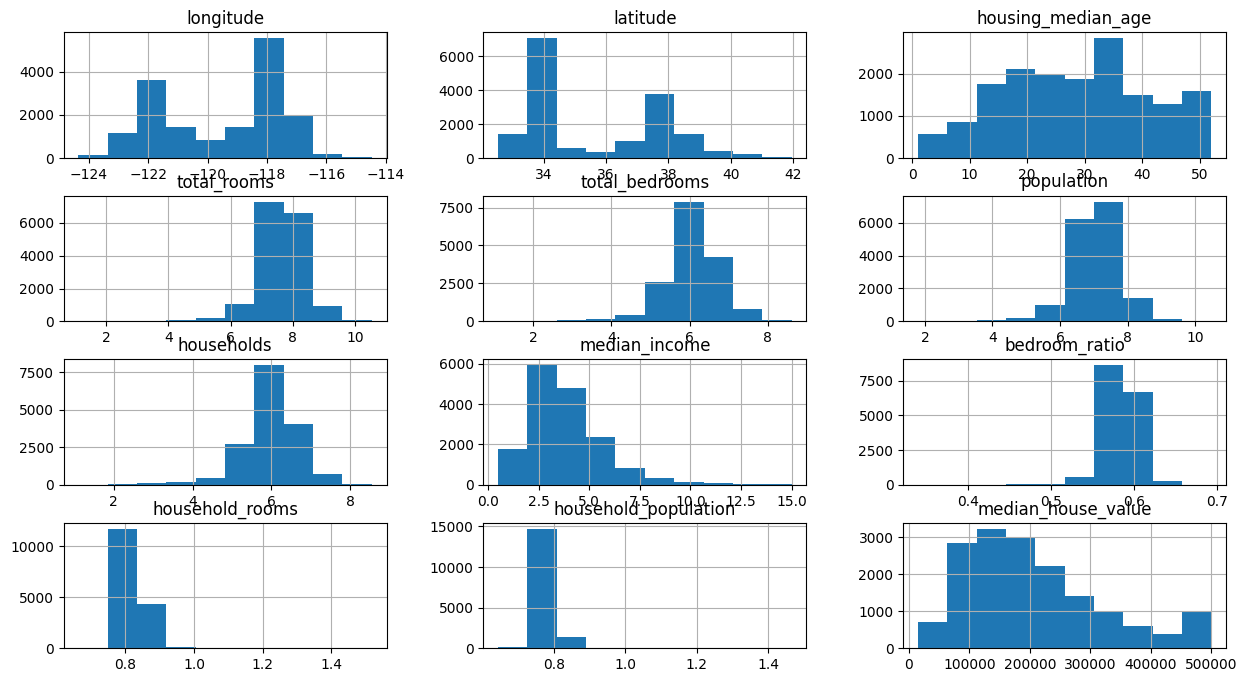

In [430]:
train_data.hist(figsize=[15,8])

In [431]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms,household_population,median_house_value
2684,-115.55,32.98,24.0,7.850104,6.274762,7.277939,6.161207,3.2593,False,True,False,False,False,0.587410,0.821592,0.779899,80800.0
11718,-120.10,39.20,20.0,7.440734,5.686975,6.016157,5.164786,3.0870,False,True,False,False,False,0.567756,0.892271,0.772347,196900.0
13983,-116.85,34.98,26.0,8.190632,6.675823,7.428927,6.411818,2.6587,False,True,False,False,False,0.596116,0.823046,0.769474,57400.0
1640,-121.84,37.98,8.0,8.923458,6.993933,8.109526,6.924612,5.2699,False,True,False,False,False,0.578729,0.827966,0.775241,204200.0
6123,-117.93,34.12,36.0,5.686975,4.219508,5.587249,4.394449,3.5385,False,True,False,False,False,0.555011,0.830352,0.820411,134400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10520,-117.69,33.55,4.0,7.475906,5.398163,6.559615,5.416100,8.3275,True,False,False,False,False,0.543530,0.867231,0.793505,384200.0
8183,-118.09,33.79,36.0,8.345455,6.489205,7.555905,6.448889,5.8491,True,False,False,False,False,0.575249,0.830337,0.775492,247300.0
19962,-119.29,36.12,24.0,7.130099,5.424950,6.464588,5.303305,2.4722,False,True,False,False,False,0.565798,0.852056,0.797045,129200.0
9639,-120.85,37.08,3.0,8.139149,6.416732,7.370860,6.131226,4.1779,False,True,False,False,False,0.581310,0.844791,0.789449,147800.0


In [432]:
train_data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms,household_population,median_house_value
longitude,1.000000,-0.924470,-0.105480,0.023304,0.056066,0.105395,0.051040,-0.022514,0.320190,-0.056230,0.008500,-0.476135,0.052362,0.097302,-0.072133,0.095551,-0.048520
latitude,-0.924470,1.000000,0.009752,-0.027243,-0.064430,-0.134872,-0.084330,-0.073763,-0.445060,0.352182,-0.014599,0.359814,-0.167723,-0.112440,0.147002,-0.075524,-0.141409
housing_median_age,-0.105480,0.009752,1.000000,-0.307316,-0.266242,-0.239218,-0.235619,-0.120089,0.044409,-0.233318,0.025037,0.255164,0.016022,-0.032804,-0.040510,0.065614,0.103135
total_rooms,0.023304,-0.027243,-0.307316,1.000000,0.946220,0.866961,0.931740,0.208952,0.020928,-0.017127,-0.003256,-0.010820,0.003080,0.426598,-0.374949,-0.553441,0.161913
total_bedrooms,0.056066,-0.064430,-0.266242,0.946220,1.000000,0.899526,0.974530,-0.022138,0.042098,-0.048904,0.000319,-0.010631,0.015451,0.685002,-0.562255,-0.586633,0.056066
population,0.105395,-0.134872,-0.239218,0.866961,0.899526,1.000000,0.934492,-0.002321,0.118824,-0.079463,-0.009911,-0.052941,-0.015511,0.587122,-0.634840,-0.271058,-0.017877
households,0.051040,-0.084330,-0.235619,0.931740,0.974530,0.934492,1.000000,0.006970,0.072141,-0.090768,-0.006953,0.000382,0.018895,0.646685,-0.665721,-0.578909,0.074659
median_income,-0.022514,-0.073763,-0.120089,0.208952,-0.022138,-0.002321,0.006970,1.000000,0.167127,-0.238559,-0.006286,0.056448,0.030183,-0.502785,0.348700,-0.019465,0.688843
<1H OCEAN,0.320190,-0.445060,0.044409,0.020928,0.042098,0.118824,0.072141,0.167127,1.000000,-0.604881,-0.012063,-0.317293,-0.342866,0.076070,-0.134065,0.062541,0.254692
INLAND,-0.056230,0.352182,-0.233318,-0.017127,-0.048904,-0.079463,-0.090768,-0.238559,-0.604881,1.000000,-0.009205,-0.242109,-0.261623,-0.101681,0.187746,0.062449,-0.483590


<Axes: >

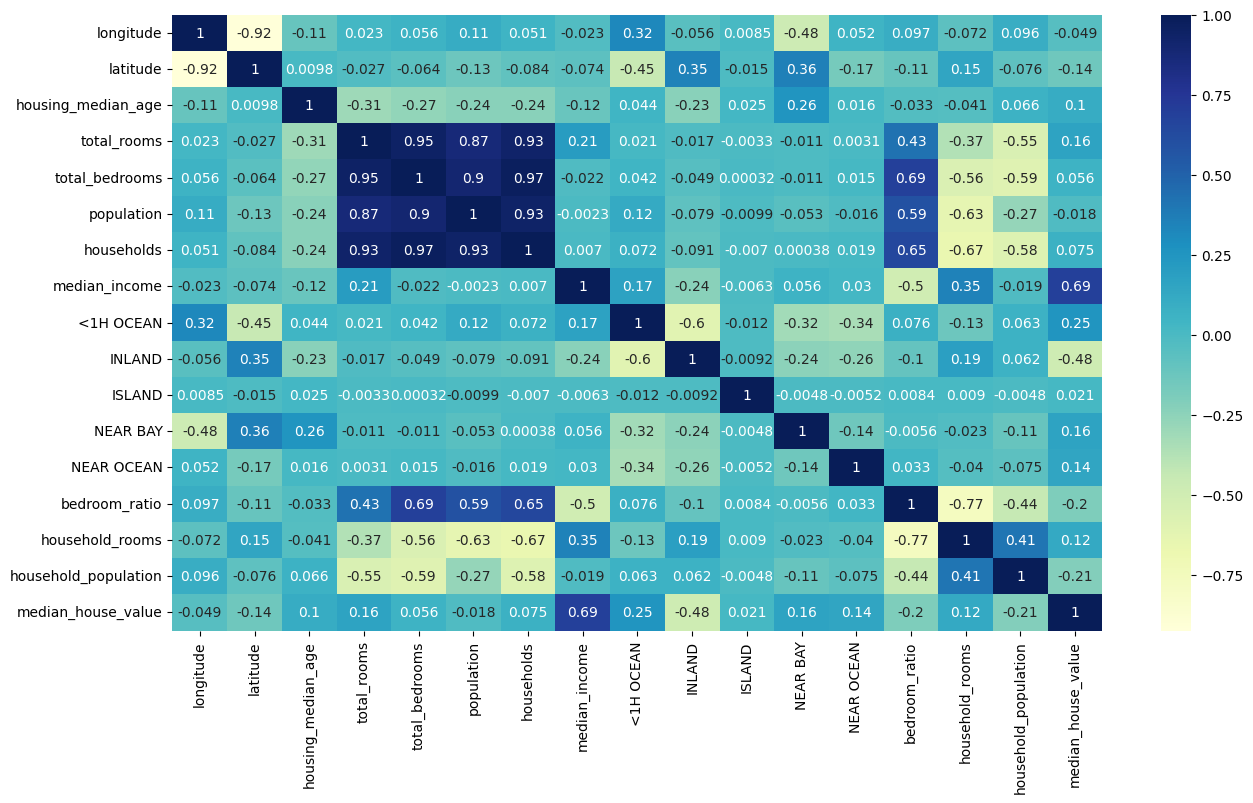

In [433]:
# Correlation
plt.figure(figsize=[15,8])
sns.heatmap(train_data.corr(),annot=True,cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

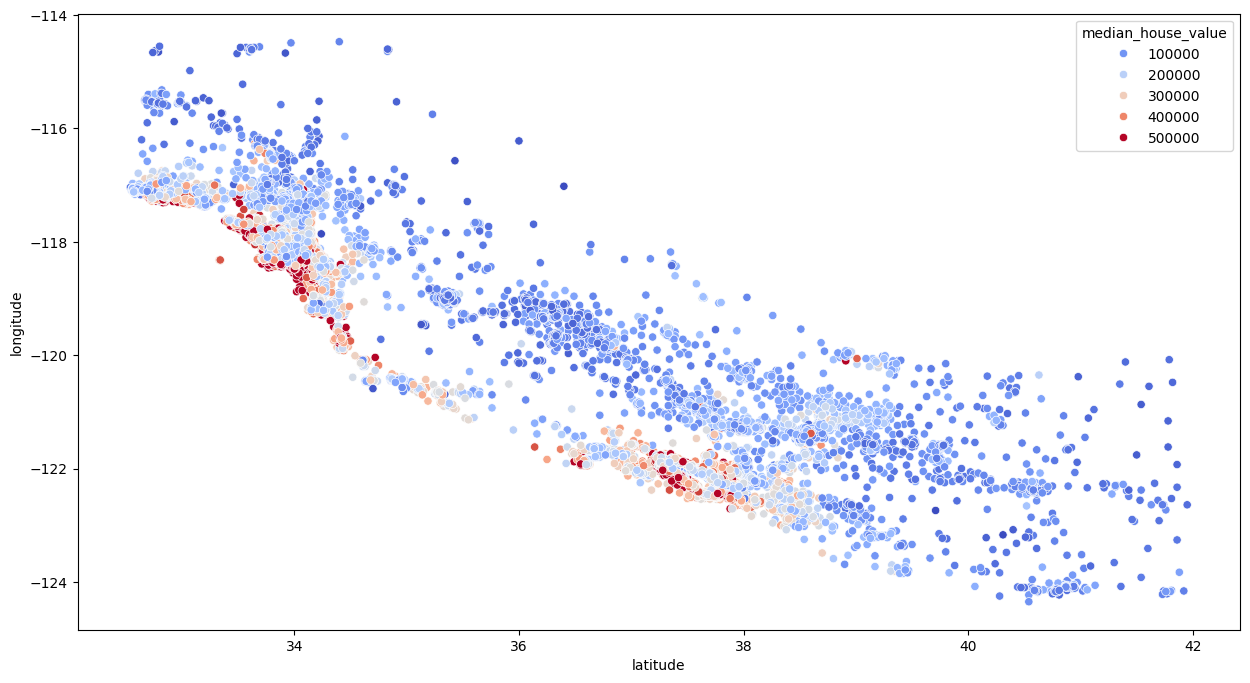

In [434]:
# California Visualization based on House Prices
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude",y="longitude",data=train_data,hue="median_house_value",palette="coolwarm")

In [435]:
x_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms,household_population
2684,-115.55,32.98,24.0,7.850104,6.274762,7.277939,6.161207,3.2593,False,True,False,False,False,0.587410,0.821592,0.779899
11718,-120.10,39.20,20.0,7.440734,5.686975,6.016157,5.164786,3.0870,False,True,False,False,False,0.567756,0.892271,0.772347
13983,-116.85,34.98,26.0,8.190632,6.675823,7.428927,6.411818,2.6587,False,True,False,False,False,0.596116,0.823046,0.769474
1640,-121.84,37.98,8.0,8.923458,6.993933,8.109526,6.924612,5.2699,False,True,False,False,False,0.578729,0.827966,0.775241
6123,-117.93,34.12,36.0,5.686975,4.219508,5.587249,4.394449,3.5385,False,True,False,False,False,0.555011,0.830352,0.820411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10520,-117.69,33.55,4.0,7.475906,5.398163,6.559615,5.416100,8.3275,True,False,False,False,False,0.543530,0.867231,0.793505
8183,-118.09,33.79,36.0,8.345455,6.489205,7.555905,6.448889,5.8491,True,False,False,False,False,0.575249,0.830337,0.775492
19962,-119.29,36.12,24.0,7.130099,5.424950,6.464588,5.303305,2.4722,False,True,False,False,False,0.565798,0.852056,0.797045
9639,-120.85,37.08,3.0,8.139149,6.416732,7.370860,6.131226,4.1779,False,True,False,False,False,0.581310,0.844791,0.789449


In [436]:
x_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms,household_population
3611,-118.43,34.24,36.0,7.305860,5.749393,7.108244,5.693732,4.0208,True,False,False,False,False,0.580514,0.825552,0.810234
6424,-118.00,34.14,39.0,7.172425,5.717028,6.685861,5.676754,3.2723,False,True,False,False,False,0.586166,0.816900,0.778297
17384,-120.40,34.95,8.0,7.542213,5.659482,6.728629,5.673323,5.0206,True,False,False,False,False,0.559830,0.845618,0.782079
20420,-118.83,34.18,23.0,8.639057,6.668228,7.626083,6.605298,6.3586,True,False,False,False,False,0.572035,0.836337,0.767577
2389,-119.48,37.00,16.0,7.974189,6.313548,7.291656,6.234411,3.1736,False,True,False,False,False,0.583192,0.823763,0.774535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20087,-120.33,38.00,14.0,7.573017,5.802118,6.712956,5.752573,3.5000,False,True,False,False,False,0.568806,0.840039,0.773320
6777,-118.16,34.12,38.0,7.710653,6.194405,6.846943,6.184149,5.4165,True,False,False,False,False,0.589650,0.809525,0.745349
17782,-121.83,37.37,43.0,6.711740,5.010635,5.916202,4.912655,4.2500,True,False,False,False,False,0.557641,0.861291,0.790400
20144,-119.05,34.35,39.0,6.857514,5.707110,7.220374,5.746203,2.2443,True,False,False,False,False,0.605540,0.785452,0.813836


In [437]:
# Linear Regression Model
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [438]:
reg.fit(x_train,y_train)

LinearRegression()

In [439]:
reg.score(x_test,y_test)

0.6753262800971414

In [442]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [446]:
x_train_s=scaler.fit_transform(x_train)
reg.fit(x_train_s,y_train)

LinearRegression()

In [447]:
x_test_s=scaler.transform(x_test)

In [448]:
reg.score(x_test_s,y_test)

0.6753262800971411

In [ ]:
#Random Forest Regressor Model